In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_ind
import seaborn as sns
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (<ipython-input-40-8e2eec6c1193>, line 8)

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
                       
student_performance = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()


In [4]:
display(student_performance)
print(student_performance.isnull().sum()/len(student_performance))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

## Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [6]:
gender = student_performance.groupby('gender')
ethnicity = student_performance.groupby('race/ethnicity')
parental_ed = student_performance.groupby('parental level of education')

In [9]:
display(gender.mean())
display(ethnicity.mean())
display(parental_ed.mean())

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


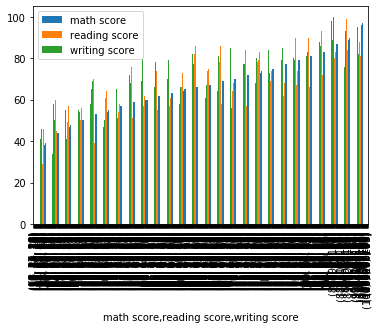

In [72]:
student_performance_grades = student_performance.groupby(['math score', 'reading score', 'writing score'])['math score', 'reading score', 'writing score'].mean()

student_performance_grades.plot(kind='bar')

In [41]:
genders = student_performance["gender"].unique()
grouped_df = student_performance.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print(ttest_ind(
                student_performance[student_performance["gender"]==genders[i]][var], 
                student_performance[student_performance["gender"]==genders[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


we see significant statistical differences between male and female in all three categories

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


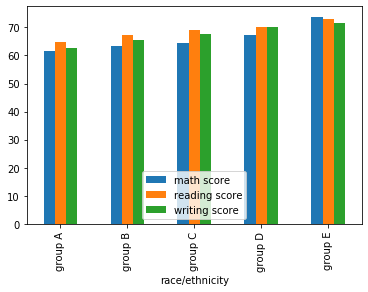

In [42]:
ethnicity.mean().plot(kind='bar')

ethnicities = student_performance["race/ethnicity"].unique()
grouped_df = student_performance.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print("t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_performance[student_performance["race/ethnicity"]==ethnicities[i]][var], 
                student_performance[student_performance["race/ethnicity"]==ethnicities[j]][var]
            ))

statistically a, b, and c seem to be pretty similar. E stands out statistically as being significantly different from the rest of the groups, except when comparing to D in writing.

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

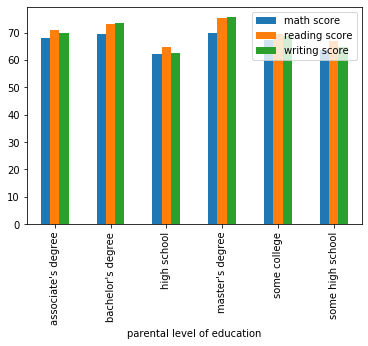

In [44]:
parental_ed.mean().plot(kind='bar')

parental_education = student_performance["parental level of education"].unique()
grouped_df = student_performance.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parental_education)):
        for j in range(i+1, len(parental_education)):
            print("t-test between groups {0} and {1}:".format(parental_education[i], parental_education[j]))
            print(ttest_ind(
                student_performance[student_performance["parental level of education"]==parental_education[i]][var], 
                student_performance[student_performance["parental level of education"]==parental_education[j]][var]
            ))

There are some statistically significant differences between parental education at the college and high school levels.

## Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


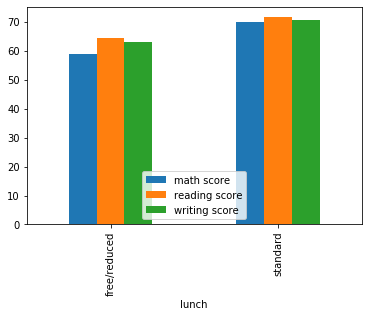

In [61]:
student_performance.groupby('lunch').mean().plot(kind='bar')

lunch_type = student_performance["lunch"].unique()
grouped_df = student_performance.groupby("lunch")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunch_type)):
        for j in range(i+1, len(lunch_type)):
            print("t-test between groups {0} and {1}:".format(lunch_type[i], lunch_type[j]))
            print(ttest_ind(
                student_performance[student_performance["lunch"]==lunch_type[i]][var], 
                student_performance[student_performance["lunch"]==lunch_type[j]][var]
            ))

free or reduced meals directly correlate to poorer scores

In [70]:
def run_ttest(df, new_test_variable, test_column_name, test_columns):
    new_test_variable = df[test_column_name]
    for var in [test_columns]:
        print("------------------------------------------------")
        print("Comparisons for variable: {}".format(var))
        print("------------------------------------------------")
        for i in range(0, len(new_test_variable)):
            for j in range(1+1, len(new_test_variable)):
                print('t-test between groups {0} and {1}:'.format(new_test_variable[i], new_test_variable[j]))
                print(ttest_ind(
                    df[df[test_column_name]==new_test_variable[i]][var],
                    df[df[test_column_name]==new_test_variable[j]][var]))
                
                ###what did i do wrong here?

In [67]:
run_ttest(student_performance, preparation, 'test preparation course', ['math score', 'reading score', 'writing score'])

NameError: name 'preparation' is not defined

## Does the test preparation course seem to have an effect on the exam performances?

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


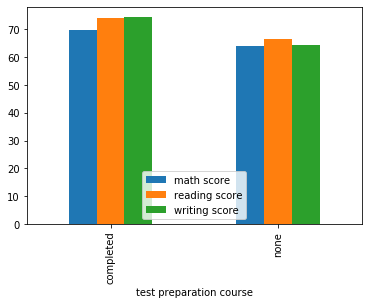

In [68]:
student_performance.groupby('test preparation course').mean().plot(kind='bar')
       
preparation = student_performance["test preparation course"].unique()
grouped_df = student_performance.groupby("test preparation course")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(preparation)):
        for j in range(i+1, len(preparation)):
            print("t-test between groups {0} and {1}:".format(preparation[i], preparation[j]))
            print(ttest_ind(
                student_performance[student_performance["test preparation course"]==preparation[i]][var], 
                student_performance[student_performance["test preparation course"]==preparation[j]][var]
            ))

preparation certainly has an impact on scores

## Which 2 exam scores are most correlated with each other?

TypeError: can only concatenate str (not "int") to str

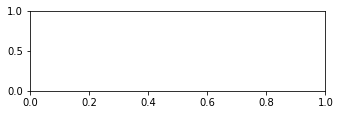

In [75]:
plt.figure(figsize=(18,5))

scores = ['math score', 'reading score', 'writing score']

for i, col in enumerate(scores):
    plt.subplot(len(scores), 3, i+1)
    sns.scatterplot(student_performance[col], student_performance[col+1])
    

plt.show()
#now that there are 2 columns to operate on, how do I iterate this?

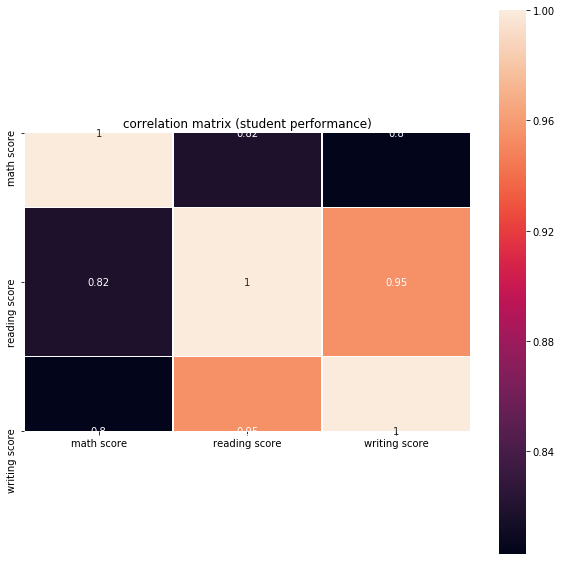

In [86]:
plt.figure(figsize=(10,10))
score_corr = student_performance.corr()

sns.heatmap(score_corr, square=True, annot=True,  linewidths=.5)
plt.title("correlation matrix (student performance)")
plt.show()
#what's wrong with this picture?

In [83]:
print(score_corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


reading and writing are most closely correlated